## Exercise 1: Duplicate Detection and Removal

In [2]:
# Objective: Identify and remove duplicate entries in the Titanic dataset.

# Load the Titanic dataset.
# Identify if there are any duplicate rows based on all columns.
# Remove any duplicate rows found in the dataset.
# Verify the removal of duplicates by checking the number of rows before and after the duplicate removal.

In [21]:
!pip install kaggle
!pip install scikit-learn


[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


   ---------------------------------------- 0.0/10.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/10.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/10.9 MB 445.2 kB/s eta 0:00:25
   ---------------------------------------- 0.1/10.9 MB 657.6 kB/s eta 0:00:17
   ---------------------------------------- 0.1/10.9 MB 804.6 kB/s eta 0:00:14
    --------------------------------------- 0.3/10.9 MB 1.3 MB/s eta 0:00:09
   - -------------------------------------- 0.4/10.9 MB 1.7 MB/s eta 0:00:07
   -- ------------------------------------- 0.6/10.9 MB 2.3 MB/s eta 0:00:05
   --- ------------------------------------ 1.1/10.9 MB 3.2 MB/s eta 0:00:04
   ----- ---------------------------------- 1.4/10.9 MB 3.7 MB/s eta 0:00:03
   -------- ------------------------------- 2.2/10.9 MB 5.2 MB/s eta 0:00:02
   ------------ --------------------------- 3.4/10.9 MB 7.3 MB/s eta 0:00:02
   ---------------- ----------------------- 4.4/10.9 MB 8.6 MB/s eta 0:00:01
   ----


[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [12]:
import os

os.environ['KAGGLE_CONFIG_DIR'] = r"C:\Users\Vlad\.kaggle"
os.environ['KAGGLE_CONFIG_DIR']

'C:\\Users\\Vlad\\.kaggle'

In [13]:
!kaggle competitions download -c titanic


  0%|          | 0.00/34.1k [00:00<?, ?B/s]
100%|██████████| 34.1k/34.1k [00:00<00:00, 717kB/s]


In [14]:
import zipfile

with zipfile.ZipFile("titanic.zip", 'r') as f:
    f.extractall(".")

In [249]:
import pandas as pd

df = pd.read_csv("train.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [250]:
df[df.duplicated()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [251]:
df.drop_duplicates(inplace=True)
# still no duplicates :)
df[df.duplicated()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


## Exercise 2: Handling Missing Values

In [252]:
# Instructions
# Identify columns in the Titanic dataset with missing values.
# Explore different strategies for handling missing data, such as removal, imputation, and filling with a constant value.
# Apply each strategy to different columns based on the nature of the data.
# Hint: Review methods like dropna(), fillna(), and SimpleImputer from scikit-learn.



In [253]:
from sklearn.impute import SimpleImputer

df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [254]:
df.dropna(subset=['Cabin'], inplace=True)

In [255]:

age_imputer = SimpleImputer(strategy='mean')
df['Age'] = age_imputer.fit_transform(df[['Age']])

In [256]:
df['Embarked'].mode()

0    S
Name: Embarked, dtype: object

In [257]:
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode().values[0])

In [258]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

##  Exercise 3: Feature Engineering

In [259]:
# Instructions
# Create new features, such as Family Size from SibSp and Parch, and Title extracted from the Name column.
# Convert categorical variables into numerical form using techniques like one-hot encoding or label encoding.
# Normalize or standardize numerical features if required.
# Hint: Utilize Pandas for data manipulation and scikit-learn’s preprocessing module for encoding

In [260]:
from sklearn.preprocessing import StandardScaler

df['family_size'] = df['SibSp'] + df['Parch'] + 1

In [261]:
df['Name']

1      Cumings, Mrs. John Bradley (Florence Briggs Th...
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
6                                McCarthy, Mr. Timothy J
10                       Sandstrom, Miss. Marguerite Rut
11                              Bonnell, Miss. Elizabeth
                             ...                        
871     Beckwith, Mrs. Richard Leonard (Sallie Monypeny)
872                             Carlsson, Mr. Frans Olof
879        Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)
887                         Graham, Miss. Margaret Edith
889                                Behr, Mr. Karl Howell
Name: Name, Length: 204, dtype: object

In [262]:
title_pattern = r', ([A-Za-z\s]+)\.'
df['Name'].str.extract(title_pattern, expand=False)

1       Mrs
3       Mrs
6        Mr
10     Miss
11     Miss
       ... 
871     Mrs
872      Mr
879     Mrs
887    Miss
889      Mr
Name: Name, Length: 204, dtype: object

In [263]:
df['title'] = df['Name'].str.extract(title_pattern, expand=False)

In [264]:
dummies = pd.get_dummies(df[['title', 'Embarked']], drop_first=True)
df = pd.concat([df, dummies], axis=1)

scaler = StandardScaler()
df[['age_scaled', 'fare_scaled', 'family_size_scaled']] = scaler.transform(df[['Age', 'Fare', 'family_size']])


In [265]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'family_size', 'title',
       'title_Col', 'title_Dr', 'title_Lady', 'title_Major', 'title_Master',
       'title_Miss', 'title_Mlle', 'title_Mme', 'title_Mr', 'title_Mrs',
       'title_Sir', 'title_the Countess', 'Embarked_Q', 'Embarked_S',
       'age_scaled', 'fare_scaled', 'family_size_scaled'],
      dtype='object')

In [266]:
for col in [c for c in df.columns if c.startswith('title_')]:
    print(col, df.loc[df[col], ['Name', 'title']].head())

title_Col                                     Name title
647  Simonius-Blumer, Col. Oberst Alfons   Col
title_Dr                             Name title
245  Minahan, Dr. William Edward    Dr
632    Stahelin-Maeglin, Dr. Max    Dr
796  Leader, Dr. Alice (Farnham)    Dr
title_Lady                                                   Name title
556  Duff Gordon, Lady. (Lucille Christiana Sutherl...  Lady
title_Major                                   Name  title
449     Peuchen, Major. Arthur Godfrey  Major
536  Butt, Major. Archibald Willingham  Major
title_Master                                Name   title
183       Becker, Master. Richard F  Master
193      Navratil, Master. Michel M  Master
305  Allison, Master. Hudson Trevor  Master
340  Navratil, Master. Edmond Roger  Master
445       Dodge, Master. Washington  Master
title_Miss                                 Name title
10   Sandstrom, Miss. Marguerite Rut  Miss
11          Bonnell, Miss. Elizabeth  Miss
61               Icard, Miss. A

## Exercise 4: Outlier Detection and Handling

In [267]:
# Instructions
# Use statistical methods to detect outliers in columns like Fare and Age.
# Decide on a strategy to handle the identified outliers, such as capping, transformation, or removal.
# Implement the chosen strategy and assess its impact on the dataset.
# Hint: Explore methods like IQR (Interquartile Range) and Z-score for outlier detection.

In [268]:
q1 = df['Fare'].quantile(0.25)
q3 = df['Fare'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
# first create mask so we can apply it after calculating other statistics
fare_outliers_mask = (df['Fare'] >= lower_bound) & (df['Fare'] <= upper_bound)

In [271]:
# Age Z-Score
import numpy as np

# standartization the same formula as z-score
th = 3
df['zs_age'] = (df['Age'] - df['Age'].mean()) / df['Age'].std()
np.all((df['age_scaled'] - df['zs_age']) < 1e-2) # we can confirm that 

np.True_

In [273]:
age_zs_mask = df['Age'] < th

In [ ]:
# apply mask where first or second is true
df = df[fare_outliers_mask | age_zs_mask]

<Axes: >

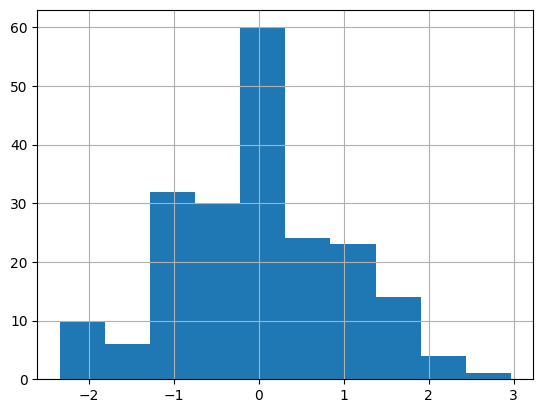

In [179]:
df['Age'].hist()

## Exercise 5: Data Standardization and Normalization

In [217]:
# Instructions
# Assess the scale and distribution of numerical columns in the dataset.
# Apply standardization to features with a wide range of values.
# Normalize data that requires a bounded range, like [0, 1].
# Hint: Consider using StandardScaler and MinMaxScaler from scikit-learn’s preprocessing module.

In [219]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,family_size,zs_age
count,204.000000,204.000000,204.000000,2.040000e+02,204.000000,204.000000,2.040000e+02,2.040000e+02,2.040000e+02
mean,455.401961,0.666667,1.196078,1.654450e-16,0.441176,0.436275,3.265362e-18,8.707632e-18,0.000000e+00
std,251.379279,0.472564,0.525961,1.002460e+00,0.628918,0.729976,1.002460e+00,1.002460e+00,1.000000e+00
min,2.000000,0.000000,1.000000,-2.344332e+00,0.000000,0.000000,-1.026039e+00,-8.124705e-01,-2.338579e+00
25%,261.750000,0.000000,1.000000,-7.272408e-01,0.000000,0.000000,-6.291455e-01,-8.124705e-01,-7.254561e-01
50%,457.500000,1.000000,1.000000,0.000000e+00,0.000000,0.000000,-2.819146e-01,1.134735e-01,-1.650390e-16
75%,684.000000,1.000000,1.000000,7.501678e-01,1.000000,1.000000,1.776956e-01,1.134735e-01,7.483269e-01
max,890.000000,1.000000,3.000000,2.966281e+00,3.000000,4.000000,5.877812e+00,3.817250e+00,2.959002e+00


In [275]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df['Age_norm'] = scaler.fit_transform(df[['Age']])

df['Age_norm']

1      0.468892
3      0.430956
6      0.671219
10     0.038948
11     0.721801
         ...   
871    0.582701
872    0.405665
879    0.696510
887    0.228629
889    0.317147
Name: Age_norm, Length: 204, dtype: float64

## Exercise 6: Feature Encoding

In [222]:
# Instructions
# Identify categorical columns in the Titanic dataset, such as Sex and Embarked.
# Use one-hot encoding for nominal variables and label encoding for ordinal variables.
# Integrate the encoded features back into the main dataset.
# Hint: Utilize pandas.get_dummies() for one-hot encoding and LabelEncoder from scikit-learn for label encoding.

In [224]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['sex_label'] = le.fit_transform(df['Sex'])
df['embarked_label'] = le.fit_transform(df['Embarked'])
df[['Sex', 'sex_label', 'Embarked', 'embarked_label']].head()

,Sex,Sex_label,Embarked,Embarked_label
1,female,0,C,0
3,female,0,S,2
6,male,1,S,2
10,female,0,S,2
11,female,0,S,2


## Exercise 7: Data Transformation for Age Feature

In [ ]:
# bCreate age groups (bins) from the Age column to categorize passengers into different age categories.
# Apply one-hot encoding to the age groups to convert them into binary features.
# Hint: Use pd.cut() for binning the Age column and pd.get_dummies() for one-hot encoding.

In [276]:
df['age_group'] = pd.cut(df['Age'], bins=[0, 12, 18, 35, 60, 100], labels=['Child', 'Teen', 'Young Adult', 'Adult', 'Senior'])

df = pd.get_dummies(df, columns=['age_group'], drop_first=True)

In [277]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Embarked_S,age_scaled,fare_scaled,family_size_scaled,zs_age,Age_norm,age_group_Teen,age_group_Young Adult,age_group_Adult,age_group_Senior
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,...,False,0.145773,-0.065466,0.113474,0.145416,0.468892,False,False,True,False
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,...,True,-0.055691,-0.310494,0.113474,-0.055555,0.430956,False,True,False,False
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,...,True,1.220252,-0.327170,-0.812471,1.217258,0.671219,False,False,True,False
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,...,True,-2.137494,-0.800999,1.039418,-2.132249,0.038948,False,False,False,False
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,...,True,1.488872,-0.668266,-0.812471,1.485218,0.721801,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
871,872,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47.0,1,1,11751,52.5542,...,True,0.750168,-0.317849,1.039418,0.748327,0.582701,False,False,True,False
872,873,0,1,"Carlsson, Mr. Frans Olof",male,33.0,0,0,695,5.0000,...,True,-0.190001,-0.958662,-0.812471,-0.189535,0.405665,False,True,False,False
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,...,False,1.354562,0.094554,0.113474,1.351238,0.696510,False,False,True,False
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,...,True,-1.130170,-0.621776,-0.812471,-1.127397,0.228629,False,True,False,False
